# Transfer Learning with tensorflow:
## Part 1 Feature Extraction


---

The main benefits of using transfer learning:
1. Can leverage existing neural networks that have been proven to work 
2. Can leverage a working neural network architecture which has already learned patterns with similar data to our own.

### Imports

In [14]:
import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import pathlib
import zipfile
import os
import random
import datetime

### Download data

In [5]:
# Download 10 percent of the 10 food classes dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip downloaded data
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

--2022-01-05 15:34:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.181.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   222MB/s    in 0.7s    

2022-01-05 15:34:28 (222 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
# How many images are there in each folder
for dirpath,dirnames, filenames in os.walk('/content/10_food_classes_10_percent'):
  if len(dirnames) == 0:
    print(f"There are {len(filenames)} images in {dirpath} ")
  else:
    print(f"There are {len(dirnames)} directories in {dirpath}")

There are 2 directories in /content/10_food_classes_10_percent
There are 10 directories in /content/10_food_classes_10_percent/train
There are 75 images in /content/10_food_classes_10_percent/train/hamburger 
There are 75 images in /content/10_food_classes_10_percent/train/chicken_wings 
There are 75 images in /content/10_food_classes_10_percent/train/grilled_salmon 
There are 75 images in /content/10_food_classes_10_percent/train/ice_cream 
There are 75 images in /content/10_food_classes_10_percent/train/pizza 
There are 75 images in /content/10_food_classes_10_percent/train/fried_rice 
There are 75 images in /content/10_food_classes_10_percent/train/ramen 
There are 75 images in /content/10_food_classes_10_percent/train/steak 
There are 75 images in /content/10_food_classes_10_percent/train/sushi 
There are 75 images in /content/10_food_classes_10_percent/train/chicken_curry 
There are 10 directories in /content/10_food_classes_10_percent/test
There are 250 images in /content/10_food

In [7]:
# Get the subdirectories (class_names)
data_dir = pathlib.Path('10_food_classes_10_percent/train')
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
# Function to view random images
def view_random_image(target_dir,target_class):
  """
  Gets a random image from a selected directory and calss
  """
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  # Plot out the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  
  return img

In [9]:
# Plot a random image for each class
def view_images(target_dir):
  """
  Plots a random image from each class
  """
  plt.figure(figsize=(15,15))
  for i in range(len(class_names)):
    plt.subplot(5,5,i+1)
    target_folder = target_dir + "/" + class_names[i]
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.axis("off")
    img_info = class_names[i] + "\n" + str(img.shape)
    plt.title(img_info)

Image shape: (306, 512, 3)


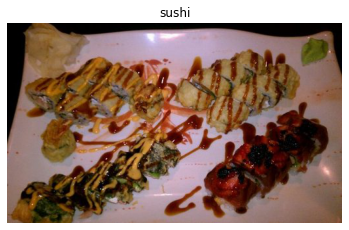

In [10]:
img = view_random_image(target_dir = '10_food_classes_10_percent/test',
                        target_class = 'sushi')

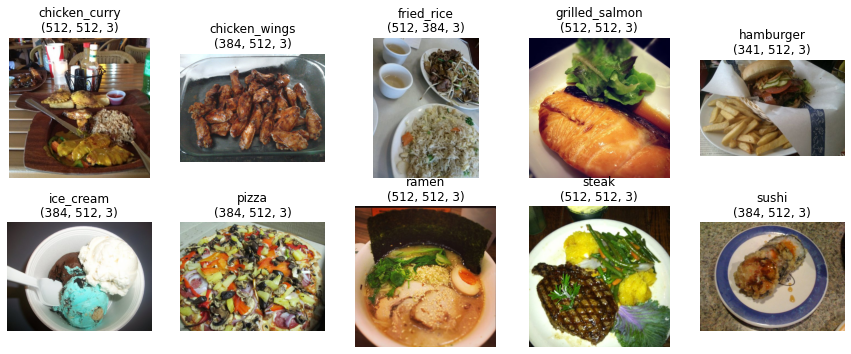

In [11]:
view_images(target_dir = "10_food_classes_10_percent/train")

## Creating data loaders (preparing the data)
we will prepare the data using tf keras ImageDataGenerator

In [12]:
# Setup global variables
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32
EPOCHS = 5




# Setup data
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size = IMAGE_SHAPE,
                                                          batch_size = BATCH_SIZE,
                                                          class_mode = "categorical")


test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                        target_size = IMAGE_SHAPE,
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = "categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Setting up callbacks
Call can be used for
* Tracking experiments with tensorboard
* Model checkpoint
* Stopping a model from overtraining


In [15]:
# Create tensorboard callback 
# We wil make it into a function in order to use it for multiple models

def create_tensorboard_callback(dir_name,experiment_name):
  """
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now.strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard
  print(f"Saving Tensorboard log files to : {log_dir}")
  return tensorboard_callback